In [168]:
from sympy import symbols, init_printing, BlockMatrix, MatrixSymbol, Matrix, block_collapse, Identity, ZeroMatrix, Eq, DiagonalMatrix
from sympy.physics.quantum import Dagger
init_printing()

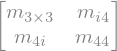

In [133]:
m33 = MatrixSymbol(r'{{m_{3\times3}}}', 3, 3)
mi4 = MatrixSymbol(r'{{m_{i4}}}', 3, 1)
m4i = MatrixSymbol(r'{{m_{4i}}}', 1, 3)
m44 = MatrixSymbol('{{m_{44}}}', 1,1)
M = BlockMatrix([
    [m33,mi4],
    [m4i,m44]
])
M

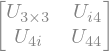

In [134]:
U33 = MatrixSymbol(r'{{U_{3\times3}}}', 3, 3)
Ui4 = MatrixSymbol(r'{{U_{i4}}}', 3, 1)
U4i = MatrixSymbol(r'{{U_{4i}}}', 1, 3)
U44 = MatrixSymbol('{{U_{44}}}', 1,1)
U = BlockMatrix([
    [U33,Ui4],
    [U4i,U44]
])
U

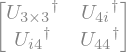

In [135]:
UDagger = BlockMatrix([
    [Dagger(U33), Dagger(U4i)],
    [Dagger(Ui4), Dagger(U44)]
])
UDagger

In [136]:
UDU = block_collapse(UDagger*U)

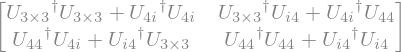

In [137]:
UDU

In [138]:
UDU33 = UDU.args[0].args[2].args[0]
display(UDU33.shape)
UDU33

It follows that 

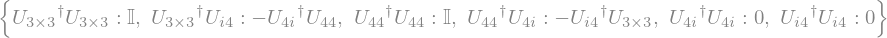

In [139]:
subs_block_unitarity = {
    Dagger(U33)*U33:Identity(3),
    Dagger(U4i)*U4i:ZeroMatrix(3,3),
    Dagger(U33)*Ui4:-Dagger(U4i)*U44,
    Dagger(U44)*U4i:-Dagger(Ui4)*U33,
    Dagger(U44)*U44:Identity(1),
    Dagger(Ui4)*Ui4:ZeroMatrix(1,1)
}
subs_block_unitarity

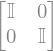

In [140]:
block_collapse(UDU.subs(subs_block_unitarity))

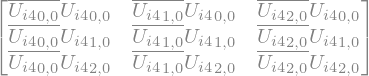

In [166]:
(Ui4*Dagger(Ui4)).as_explicit()

In [167]:
(U4i*Dagger(U4i)).as_explicit()

## Diagonalization

In [141]:
mlight = block_collapse(UDagger*M*U)

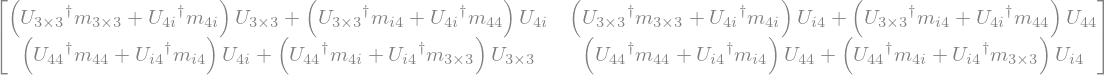

In [142]:
mlight

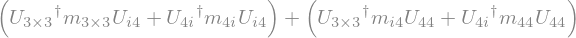

In [143]:
mixLR = mlight.args[0].args[2].args[1].expand()
mixLR

In [144]:
mixLR.shape

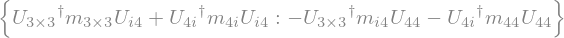

In [145]:
subs_block_diagonalizationLR = {
    Dagger(U33)*m33*Ui4 + Dagger(U4i)*m4i*Ui4: -(Dagger(U33)*mi4*U44 + Dagger(U4i)*m44*U44)
}
subs_block_diagonalizationLR

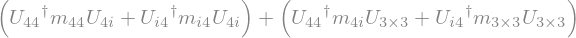

In [146]:
mixRL = mlight.args[0].args[2].args[2].expand()
mixRL

In [147]:
mixRL.shape

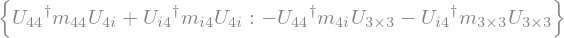

In [148]:
subs_block_diagonalizationRL = {
    Dagger(U44)*m44*U4i + Dagger(Ui4)*mi4*U4i: -(Dagger(U44)*m4i*U33 + Dagger(Ui4)*m33*U33)
}
subs_block_diagonalizationRL

In [149]:
mnu = block_collapse(mlight.args[0].args[2].args[0].expand())
mnu

In [150]:
mnu.shape

In [151]:
mnu

In [152]:
subs_block_diagonalization_mnu = {}

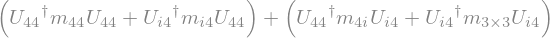

In [153]:
m4 = mlight.args[0].args[2].args[3].expand()
m4

In [154]:
m4.shape

## Inverse transformation

In [185]:
ml = MatrixSymbol('{{m_l}}', 3, 3)
mh = MatrixSymbol('{{m_h}}', 1, 1)

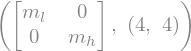

In [186]:
Mdiag = BlockMatrix([
    [ml, ZeroMatrix(3, 1)],
    [ZeroMatrix(1, 3), mh]
])


Mdiag, Mdiag.shape

In [188]:
UMdiagUD = block_collapse(U*Mdiag*UDagger)

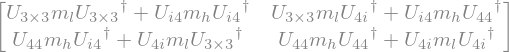

In [189]:
UMdiagUD

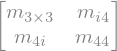

In [190]:
M

In [191]:
eq11 = Eq(M.blocks[0,0], UMdiagUD.blocks[0,0])
eq12 = Eq(M.blocks[0,1], UMdiagUD.blocks[0,1])
eq21 = Eq(M.blocks[1,0], UMdiagUD.blocks[1,0])
eq22 = Eq(M.blocks[1,1], UMdiagUD.blocks[1,1])

In [192]:
for eq in [eq11, eq12, eq21, eq22]:
    display(eq)

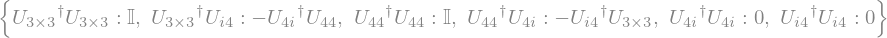

In [161]:
subs_block_unitarity

In [162]:
eq11 = Eq(M.blocks[0,0], block_collapse(UMdiagUD.blocks[0,0].subs(Ui4*mh*Dagger(Ui4), ZeroMatrix(3, 3))))
eq12 = Eq(M.blocks[0,1], UMdiagUD.blocks[0,1])
eq21 = Eq(M.blocks[1,0], UMdiagUD.blocks[1,0])
eq22 = Eq(M.blocks[1,1], UMdiagUD.blocks[1,1])

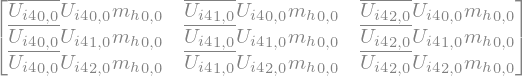

In [163]:
(Ui4*mh*Dagger(Ui4)).as_explicit()

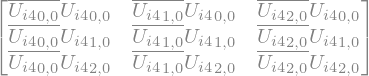

In [164]:
(Ui4*Dagger(Ui4)).as_explicit()


In [165]:
(Dagger(Ui4)*Ui4).as_explicit()

In [129]:
for eq in [eq11, eq12, eq21, eq22]:
    display(eq)

Then we obtain the following relations

In [130]:
eq_ml = Eq(ml, Dagger(U33)*m33*U33)
eq_ml